# Image Classification with CNN for CIFAR_10 Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
import matplotlib.pyplot as plt

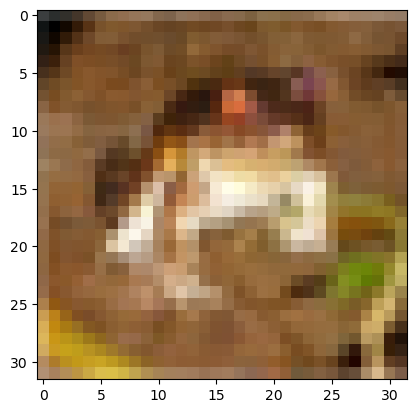

In [5]:
plt.imshow(x_train[0],cmap="gray")

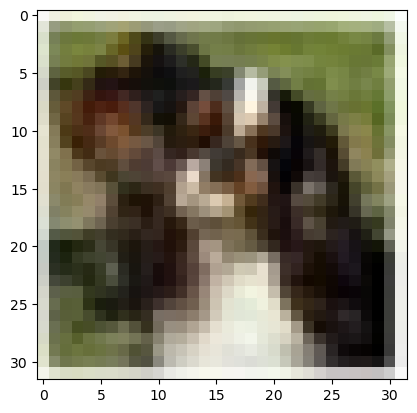

In [6]:
plt.imshow(x_train[500],cmap="gray")

In [7]:
#normalize/standardize
x_train=x_train/255
x_test=x_test/255

In [8]:
# One-Hot-Encoding
y_train_en = to_categorical(y_train,10)
y_test_en = to_categorical(y_test,10)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,InputLayer,Reshape

In [10]:
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation ="relu"))
model.add(Dense(10, activation ="softmax"))
model.compile(loss ="categorical_crossentropy", optimizer ="adam", metrics =["accuracy"])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 2)

In [14]:

model.fit(x_train, y_train_en, validation_data = (x_test, y_test_en), epochs = 15, callbacks = [early_stop])

Epoch 1/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5126 - accuracy: 0.4513 - val_loss: 1.2879 - val_accuracy: 0.5392
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1872 - accuracy: 0.5793 - val_loss: 1.1334 - val_accuracy: 0.6041
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0523 - accuracy: 0.6322 - val_loss: 1.0594 - val_accuracy: 0.6262
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9551 - accuracy: 0.6664 - val_loss: 0.9963 - val_accuracy: 0.6530
Epoch 5/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8821 - accuracy: 0.6939 - val_loss: 0.9920 - val_accuracy: 0.6560
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8186 - accuracy: 0.7166 - val_loss: 0.9602 - val_accuracy: 0.6685
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7622 - accuracy: 0.7329 - val_loss: 0.9473 - val_ac

In [15]:
 
model_1 = Sequential()
model_1.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation="relu"))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.5))
model_1.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation="relu"))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(256,activation="relu"))
model_1.add(Dense(10,activation="softmax"))
model_1.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [16]:
model.fit(x_train, y_train_en, validation_data = (x_test, y_test_en), epochs = 15, callbacks = [early_stop])

Epoch 1/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6177 - accuracy: 0.7833 - val_loss: 1.0244 - val_accuracy: 0.6719
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5795 - accuracy: 0.7971 - val_loss: 1.0478 - val_accuracy: 0.6752
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5320 - accuracy: 0.8142 - val_loss: 1.0569 - val_accuracy: 0.6811


In [17]:

model_2 = Sequential()
model_2.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation="relu"))
model_2.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation="relu"))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.4))
model_2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation="relu"))
model_2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation="relu"))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.4))
model_2.add(Flatten())
model_2.add(Dense(1024,activation="relu"))
model_2.add(Dense(1024,activation="relu"))
model_2.add(Dense(units = 1, activation = "softmax"))
model_2.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [18]:
model.fit(x_train, y_train_en, validation_data = (x_test, y_test_en), epochs = 15, callbacks = [early_stop])

Epoch 1/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4987 - accuracy: 0.8263 - val_loss: 1.0821 - val_accuracy: 0.6708
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4607 - accuracy: 0.8389 - val_loss: 1.1671 - val_accuracy: 0.6746
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4297 - accuracy: 0.8463 - val_loss: 1.1930 - val_accuracy: 0.6757


In [20]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)

In [21]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.498708,0.82626,1.082089,0.6708
1,0.460716,0.83888,1.167055,0.6746
2,0.429734,0.84626,1.192991,0.6757


In [22]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<Axes: >

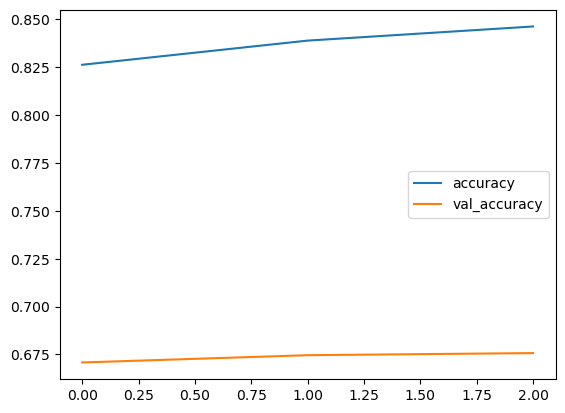

In [23]:
metrics[["accuracy", "val_accuracy"]].plot()

<Axes: >

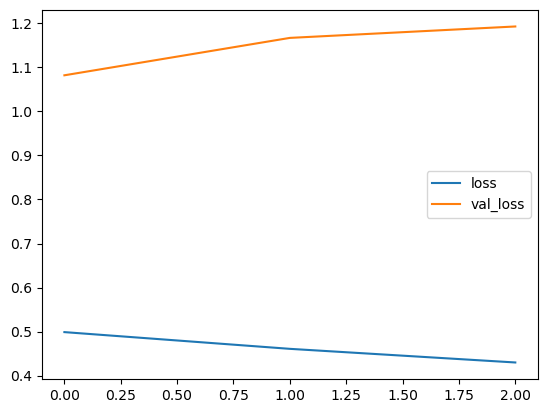

In [24]:
metrics[["loss", "val_loss"]].plot()